In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn import metrics
from ggplot import *
import statsmodels.api as sm
import gc

In [2]:
sample = pd.read_csv('C:\Projects\Marketing\Notifications\Model building\Data\Input data\\comb_sample1_20160225.csv')
bp = pd.read_csv('C:\Projects\Marketing\Notifications\Model building\Data\Input data\\bh_20160225.csv')
dp= pd.read_csv('C:\Projects\Marketing\Notifications\Model building\Data\Input data\\device_profile_20160225.csv')
tpi= pd.read_csv('C:\Projects\Marketing\Notifications\Model building\Data\Input data\\time_prefer_index.csv',usecols=['device_device_id','hr9','hr15','hr21'])
dpi= pd.read_csv('C:\Projects\Marketing\Notifications\Model building\Data\Input data\\day_prefer_index.csv',usecols=['device_device_id','thursday_ses'])

In [3]:
dataset=sample.merge(bp,on=['device_device_id']).merge(dp,on=['device_device_id']).merge(tpi,on=['device_device_id']).merge(
dpi,on=['device_device_id'])
print ('sample - %d') %len(sample)
print ('bp - %d') %len(bp)
print ('dp - %d') %len(dp)
print ('tpi - %d') %len(tpi)
print ('dpi - %d') %len(dpi)
print ('dataset - %d') %len(dataset)
del sample
del bp
del dp
del dpi
del tpi
gc.collect()

sample - 2163095
bp - 3651658
bp2 - 3651658
dp - 3651691
tpi - 3651658
dpi - 3651658
dataset - 2138169


98

In [4]:
dataset.drop(['object_title','notificationid','device_device_id','n_base'],axis=1,inplace=True)
dataset

n_time     n_date  open_flag  notifs_received_pre  notifs_opened_pre  \
0        330PM  25FEB2016          0                   51                  1   
1          9AM  25FEB2016          0                   51                  1   
2        330PM  25FEB2016          0                   35                  1   
3        330PM  25FEB2016          0                    5                NaN   
4        330PM  25FEB2016          0                   50                NaN   
5        330PM  25FEB2016          0                    9                NaN   
6        330PM  25FEB2016          0                   55                NaN   
7         09PM  25FEB2016          0                   55                NaN   
8        330PM  25FEB2016          0                    3                NaN   
9        330PM  25FEB2016          0                   30                NaN   
10       330PM  25FEB2016          0                   18                NaN   
11       330PM  25FEB2016          0                   16                NaN   
12         9AM  25FEB2016          0                   16                NaN   
13       330PM  25FEB2016          0                   10                NaN   
14       330PM  25FEB2016          0                   40                NaN   
15       330PM  25FEB2016          0                   34                NaN   
16        09PM  25FEB2016          0                   34                NaN   
17       330PM  25FEB2016          0                   34                  2   
18       330PM  25FEB2016          0                    8                NaN   
19       330PM  25FEB2016          0                   75                NaN   
20         9AM  25FEB2016          0                   75                NaN   
21       330PM  25FEB2016          0                   42                NaN   
22       330PM  25FEB2016          0                   46                  1   
23         9AM  25FEB2016          0                   46                  1   
24       330PM  25FEB2016          0                   57                  3   
25        09PM  25FEB2016          0                   57                  3   
26       330PM  25FEB2016          0                    2                NaN   
27        09PM  25FEB2016          0                    2                NaN   
28       330PM  25FEB2016          0                   38                NaN   
29        09PM  25FEB2016          0                   38                NaN   
...        ...        ...        ...                  ...                ...   
2138139   09PM  25FEB2016          0                   47                NaN   
2138140  330PM  25FEB2016          0                   52                  8   
2138141   09PM  25FEB2016          0                   50                  2   
2138142   09PM  25FEB2016          0                   54                  2   
2138143   09PM  25FEB2016          0                   23                NaN   
2138144   09PM  25FEB2016          0                   38                  1   
2138145   09PM  25FEB2016          1                   20                  1   
2138146   09PM  25FEB2016          0                   42                  3   
2138147   09PM  25FEB2016          0                   48                NaN   
2138148   09PM  25FEB2016          0                   47                  1   
2138149   09PM  25FEB2016          0                   56                NaN   
2138150   09PM  25FEB2016          0                    6                NaN   
2138151   09PM  25FEB2016          0                    7                NaN   
2138152   09PM  25FEB2016          0                   13                NaN   
2138153   09PM  25FEB2016          0                   26                NaN   
2138154   09PM  25FEB2016          0                   61                  2   
2138155  330PM  25FEB2016          0                   61                  2   
2138156  330PM  25FEB2016          0                   13                  1   
2138157 

In [5]:
univariate=dataset.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()
univariate.to_csv('C:\Projects\Marketing\Notifications\Model building\Outputs\\univariate_c_20160225.csv')
univariate

count         mean          std  min   1%        5%  \
open_flag            2138169     0.029211     0.168397    0    0    0.0000   
notifs_received_pre  2138169    44.869947    38.398427    1    2    7.0000   
notifs_opened_pre     905221     3.345524     4.380698    1    1    1.0000   
banner_clicks        1237268     7.530227    13.611940    0    0    1.0000   
sale_clicks          1237268     0.222762     0.813104    0    0    0.0000   
perc_organic         1722316     0.829033     0.263968    0    0    0.0000   
tme_since_ll         2039097     7.382107     9.217004    1    1    1.0000   
avg_disc_view        1108192     0.351272     0.156858    0    0    0.0217   
avg_mrp              1108192  2426.794003  2121.359846   80  499  799.0000   
sessions             1643303     8.824791    15.096662    1    1    1.0000   
tenure               2091670    19.929037    18.637185    0    1    2.0000   
cn_2g                2138169     0.033979     0.181174    0    0    0.0000   
cn_3g                2138169     0.076561     0.265893    0    0    0.0000   
cn_4g                2138169     0.001601     0.039985    0    0    0.0000   
cn_wifi              2138169     0.035577     0.185234    0    0    0.0000   
cn_other             2138169     0.852282     0.354820    0    0    0.0000   
hr9                  1728515     0.306897     0.508465    0    0    0.0000   
hr15                 1728515     0.363631     0.535549    0    0    0.0000   
hr21                 1728515     0.033076     0.193246    0    0    0.0000   
thursday_ses         1722316     0.396676     0.526001    0    0    0.0000   

                          10%          15%          20%        30%  \
open_flag              0.0000     0.000000     0.000000     0.0000   
notifs_received_pre   13.0000    19.000000    24.000000    33.0000   
notifs_opened_pre      1.0000     1.000000     1.000000     1.0000   
banner_clicks          1.0000     1.000000     1.000000     2.0000   
sale_clicks            0.0000     0.000000     0.000000     0.0000   
perc_organic           0.5000     0.583333     0.666667     0.8000   
tme_since_ll           1.0000     1.000000     1.000000     2.0000   
avg_disc_view          0.1246     0.184700     0.222200     0.2834   
avg_mrp              999.0000  1141.000000  1259.000000  1458.0000   
sessions               1.0000     2.000000     2.000000     3.0000   
tenure                 3.0000     4.000000     5.000000     8.0000   
cn_2g                  0.0000     0.000000     0.000000     0.0000   
cn_3g                  0.0000     0.000000     0.000000     0.0000   
cn_4g                  0.0000     0.000000     0.000000     0.0000   
cn_wifi                0.0000     0.000000     0.000000     0.0000   
cn_other               0.0000     1.000000     1.000000     1.0000   
hr9                    0.0000     0.000000     0.000000     0.0000   
hr15                   0.0000     0.000000     0.000000     0.0000   
hr21                   0.0000     0.000000     0.000000     0.0000   
thursday_ses           0.0000     0.000000     0.000000     0.0000   

                             40%        50%        60%        70%       80%  \
open_flag               0.000000     0.0000     0.0000     0.0000     0.000   
notifs_received_pre    40.000000    47.0000    53.0000    59.0000    65.000   
notifs_opened_pre       2.000000     2.0000     2.0000     3.0000     5.000   
banner_clicks           3.000000     4.0000     5.0000     7.0000    11.000   
sale_clicks             0.000000     0.0000     0.0000     0.0000     0.000   
perc_organic            0.888889     1.0000     1.0000     1.0000     1.000   
tme_since_ll            2.000000     4.0000     5.0000     7.0000    11.000   
avg_disc_view           0.327400     0.3691     0.4037     0.4461     0.493   
avg_mrp              1649.000000  1861.0000  2124.0000  2499.0000  3107.000   
sessions                4.000000     5.0000     7.0000     9.0000    13.000   
tenure                 10.000000    13.0000 

In [12]:
a=data[data['sessions']==0]
print a['open_flag'].value_counts()
del a
gc.collect()

0    492258
1      2608
Name: open_flag, dtype: int64


180

In [6]:
data=dataset.fillna(0)

data['notifs_received_pre'][data['notifs_received_pre']>80]=80
data['notifs_opened_pre'][data['notifs_opened_pre']>19]=19
#data['notifs_dismissed_pre'][data['notifs_dismissed_pre']>74]=74
data['banner_clicks'][data['banner_clicks']>56]=56
#data['searches'][data['searches']>38]=38
data['sessions'][data['sessions']>48]=48
#data['list_views'][data['list_views']>629]=629
#data['pdp_views'][data['pdp_views']>553]=553
#data['add_to_carts'][data['add_to_carts']>51]=51
#data['pdp_likes'][data['pdp_likes']>57]=57
data['hr9'][data['hr9']>1.5]=1.5
#data['number_of_article_type'][data['number_of_article_type']>19]=19
#data['avg_selling_price'][data['avg_selling_price']>3719]=3719
data['avg_mrp'][data['avg_mrp']> 10273]=10273
#data['notif_rec_pre_1day'][data['notif_rec_pre_1day']> 5]=5
#data['notif_rec_pre_2day'][data['notif_rec_pre_2day']> 10]=10
#data['notif_rec_pre_5day'][data['notif_rec_pre_5day']> 25]=25
#data['notif_opn_pre_1day'][data['notif_opn_pre_1day']> 2]=2
#data['notif_opn_pre_2day'][data['notif_opn_pre_2day']> 3]=3
#data['notif_opn_pre_5day'][data['notif_opn_pre_5day']> 8]=8

-c:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
-c:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [7]:
data['banner']=data['banner_clicks']/data['sessions']
#data['search']=data['searches']/data['sessions']
#data['list']=data['list_views']/data['sessions']
#data['pdp']=data['pdp_views']/data['sessions']
#data['atc']=data['add_to_carts']/data['sessions']
data['open_rate']=data['notifs_opened_pre']/data['notifs_received_pre']
#data['open_rate_1d']=data['notif_opn_pre_1day']/data['notif_rec_pre_1day']
#data['open_rate_2d']=data['notif_opn_pre_2day']/data['notif_rec_pre_2day']
#data['open_rate_5d']=data['notif_opn_pre_5day']/data['notif_rec_pre_5day']
#data['dismiss_rate']=data['notifs_dismissed_pre']/data['notifs_received_pre']
data['time_index']=data['hr9']
data['time_index'][data['n_time']=='330PM']=data['hr15']
data['time_index'][data['n_time']=='09PM']=data['hr21']

data=data.replace([np.inf, -np.inf], np.nan)

data.drop(['banner_clicks','hr9','hr15','hr21',
#           'list_views','pdp_views','add_to_carts',
           'n_time','n_date','notifs_opened_pre','cn_other'],axis=1,inplace=True)
data

-c:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


open_flag  notifs_received_pre  sale_clicks  perc_organic  \
0                0                   51            0      1.000000   
1                0                   51            0      1.000000   
2                0                   35            0      1.000000   
3                0                    5            0      1.000000   
4                0                   50            0      0.000000   
5                0                    9            0      1.000000   
6                0                   55            0      0.000000   
7                0                   55            0      0.000000   
8                0                    3            0      1.000000   
9                0                   30            0      1.000000   
10               0                   18            0      0.000000   
11               0                   16            0      0.000000   
12               0                   16            0      0.000000   
13               0                   10            0      0.000000   
14               0                   40            0      1.000000   
15               0                   34            0      0.000000   
16               0                   34            0      0.000000   
17               0                   34            0      1.000000   
18               0                    8            0      0.000000   
19               0                   75            0      1.000000   
20               0                   75            0      1.000000   
21               0                   42            0      0.000000   
22               0                   46            0      1.000000   
23               0                   46            0      1.000000   
24               0                   57            0      0.833333   
25               0                   57            0      0.833333   
26               0                    2            0      1.000000   
27               0                    2            0      1.000000   
28               0                   38            0      1.000000   
29               0                   38            0      1.000000   
...            ...                  ...          ...           ...   
2138139          0                   47            0      0.000000   
2138140          0                   52            0      0.600000   
2138141          0                   50            0      1.000000   
2138142          0                   54            0      0.000000   
2138143          0                   23            0      0.000000   
2138144          0                   38            2      0.500000   
2138145          1                   20            0      0.846154   
2138146          0                   42            1      0.500000   
2138147          0                   48            0      1.000000   
2138148          0                   47            0      0.000000   
2138149          0                   56            0      1.000000   
2138150          0                    6            0      1.000000   
2138151          0                    7            0      1.000000   
2138152          0                   13            0      0.000000   
2138153          0                   26            0      0.000000   
2138154          0                   61            0      0.000000   
2138155          0                   61            0      0.000000   
2138156          0                   13            0      1.000000   
2138157          0                   39            0      0.000000   
2138158          0                   30            0      1.000000   
2138159          0                   36            0      0.000000   
2138160          0                   17            0      0.000000   
2138161          0                   44            0      0.000000   
2138162          0                   54            0      1.000000   
2138163          0                   54            0      1.000000   
2138164          0 

In [12]:
corr=data.ix[:,1:].corr()
corr.to_csv('C:\Projects\Marketing\Notifications\Model building\Outputs\\correlations_comb.csv')
corr

sale_percent_full_price  purchase_frequency  \
sale_percent_full_price                 1.000000            0.165208   
purchase_frequency                      0.165208            1.000000   
number_of_article_type                  0.201945            0.485853   
avg_selling_price                       0.252119            0.355579   
notifs_received_pre                     0.054169            0.098409   
collection_flag                         0.061486            0.102871   
perc_organic                            0.056427            0.111967   
sessions                                0.086936            0.185765   
tme_since_ll                           -0.043307           -0.097604   
pdp_likes                               0.032934            0.059320   
avg_disc_view                           0.044065            0.150838   
avg_mrp                                 0.047854            0.114033   
notif_rec_pre_1day                      0.049133            0.099974   
notif_rec_pre_2day                      0.044647            0.084975   
notif_rec_pre_5day                      0.047498            0.084910   
notif_opn_pre_1day                      0.018073            0.056271   
notif_opn_pre_2day                      0.020986            0.066571   
notif_opn_pre_5day                      0.024999            0.084976   
tenure                                  0.049777            0.147674   
cn_2g                                  -0.012412           -0.019552   
cn_3g                                   0.002695           -0.006445   
cn_4g                                   0.003529           -0.000437   
cn_wifi                                -0.000010            0.009200   
thursday_ses                            0.054317            0.110555   
banner                                  0.009884            0.024004   
search                                  0.008559           -0.012601   
open_rate                               0.014042            0.052809   
dismiss_rate                            0.006530            0.009905   
time_index                              0.046395            0.092575   

                         number_of_article_type  avg_selling_price  \
sale_percent_full_price                0.201945           0.252119   
purchase_frequency                     0.485853           0.355579   
number_of_article_type                 1.000000           0.432969   
avg_selling_price                      0.432969           1.000000   
notifs_received_pre                    0.134793           0.127119   
collection_flag                        0.188585           0.149764   
perc_organic                           0.169679           0.133401   
sessions                               0.379085           0.232869   
tme_since_ll                          -0.148977          -0.106271   
pdp_likes                              0.149156           0.065584   
avg_disc_view                          0.235396           0.153145   
avg_mrp                                0.157849           0.205544   
notif_rec_pre_1day                     0.133281           0.116756   
notif_rec_pre_2day                     0.113567           0.100956   
notif_rec_pre_5day                     0.120194           0.105165   
notif_opn_pre_1day                     0.104550           0.064027   
notif_opn_pre_2day                     0.119448           0.075828   
notif_opn_pre_5day                     0.158011           0.100253   
tenure                                 0.156288           0.115824   
cn_2g                                 -0.035199          -0.026043   
cn_3g                                 -0.025706          -0.005612   
cn_4g                                 -0.000711           0.002286   
cn_wifi                               -0.003023           0.004733   
thursday_ses                           0.193734           0.134552   
banner                                 0.043988           0.015711   
search                                -0.007

In [13]:
data.fillna(0,inplace=True)
data.describe(percentiles=[.01,.05,.1,.15,.2,.3,.4,.5,.6,.7,.8,.9,.95,.97,.99]).transpose()

count         mean          std  min  1%  5%  10%  15%  \
open_flag            2138169     0.029211     0.168397    0   0   0    0    0   
notifs_received_pre  2138169    44.581004    20.816570    1   2   7   13   19   
sale_clicks          2138169     0.128903     0.628229    0   0   0    0    0   
perc_organic         2138169     0.667794     0.404724    0   0   0    0    0   
tme_since_ll         2138169     7.040057     9.133724    0   0   1    1    1   
avg_disc_view        2138169     0.182061     0.208708    0   0   0    0    0   
avg_mrp              2138169  1232.505167  1706.055299    0   0   0    0    0   
sessions             2138169     6.608942     8.818891    0   0   0    0    0   
tenure               2138169    19.495638    18.661198    0   0   1    2    4   
cn_2g                2138169     0.033979     0.181174    0   0   0    0    0   
cn_3g                2138169     0.076561     0.265893    0   0   0    0    0   
cn_4g                2138169     0.001601     0.039985    0   0   0    0    0   
cn_wifi              2138169     0.035577     0.185234    0   0   0    0    0   
thursday_ses         2138169     0.319526     0.497511    0   0   0    0    0   
banner               2138169     0.440925     0.635351    0   0   0    0    0   
open_rate            2138169     0.036030     0.080798    0   0   0    0    0   
time_index           2138169     0.189568     0.424265    0   0   0    0    0   

                     20%   30%    40%         50%          60%          70%  \
open_flag              0   0.0   0.00    0.000000     0.000000     0.000000   
notifs_received_pre   24  33.0  40.00   47.000000    53.000000    59.000000   
sale_clicks            0   0.0   0.00    0.000000     0.000000     0.000000   
perc_organic           0   0.5   0.75    0.875000     1.000000     1.000000   
tme_since_ll           1   1.0   2.00    3.000000     5.000000     7.000000   
avg_disc_view          0   0.0   0.00    0.000000     0.242600     0.336900   
avg_mrp                0   0.0   0.00  708.000000  1311.000000  1695.000000   
sessions               0   1.0   2.00    3.000000     5.000000     7.000000   
tenure                 5   7.0   9.00   13.000000    17.000000    22.000000   
cn_2g                  0   0.0   0.00    0.000000     0.000000     0.000000   
cn_3g                  0   0.0   0.00    0.000000     0.000000     0.000000   
cn_4g                  0   0.0   0.00    0.000000     0.000000     0.000000   
cn_wifi                0   0.0   0.00    0.000000     0.000000     0.000000   
thursday_ses           0   0.0   0.00    0.000000     0.000000     0.571429   
banner                 0   0.0   0.00    0.238095     0.400000     0.571429   
open_rate              0   0.0   0.00    0.000000     0.014706     0.028571   
time_index             0   0.0   0.00    0.000000     0.000000     0.000000   

                             80%          90%          95%          97%  \
open_flag               0.000000     0.000000     0.000000     0.000000   
notifs_received_pre    65.000000    71.000000    74.000000    76.000000   
sale_clicks             0.000000     0.000000     1.000000     1.000000   
perc_organic            1.000000     1.000000     1.000000     1.000000   
tme_since_ll           11.000000    19.000000    29.000000    33.000000   
avg_disc_view           0.409600     0.497100     0.543300     0.576200   
avg_mrp              2173.000000  3172.000000  4478.000000  5545.000000   
sessions               11.000000    18.000000    25.000000    31.000000   
tenure                 34.000000    50.000000    61.000000    68.000000   
cn_2g                   0.000000     0.000000     0.000000     1.000000   
cn_3g                   0.000000     0.000000     1.000000     1.000000   
cn_4g                   0.000000     0.000000     0.000000     0.000000   
cn_wifi                 0.000000     0.000000     0.000000     1.000000   
thursday_ses            0.857143     1.000000     1.285714     1.500000   
banner          

In [50]:
Y = data.open_flag
X = data.ix[:,['sessions','tme_since_ll','open_rate',
#               'perc_organic','tenure','thursday_ses','cn_2g','time_index','banner',
               'avg_disc_view','notifs_received_pre']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = LogisticRegression(class_weight='balanced')
model.fit(X, Y)
model.score(X, Y)

0.7888721611808982

In [52]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

0                    1
0             sessions    [0.0338645463823]
1         tme_since_ll   [-0.0411024568424]
2            open_rate      [6.79085236553]
3        avg_disc_view      [0.97791370947]
4  notifs_received_pre  [-0.00791526774046]

In [53]:
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [54]:
print metrics.accuracy_score(y_test, predicted)
print metrics.roc_auc_score(y_test, probs[:, 1])

0.788710283404
0.798720466589


In [55]:
print metrics.classification_report(y_test, predicted)
cm=pd.DataFrame(metrics.confusion_matrix(y_test, predicted))
cm

             precision    recall  f1-score   support

          0       0.99      0.79      0.88    622719
          1       0.09      0.66      0.16     18732

avg / total       0.96      0.79      0.86    641451



0       1
0  493474  129245
1    6287   12445

In [56]:
fpr, tpr, _ = metrics.roc_curve(y_test, predicted)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

<ggplot: (152132801)>

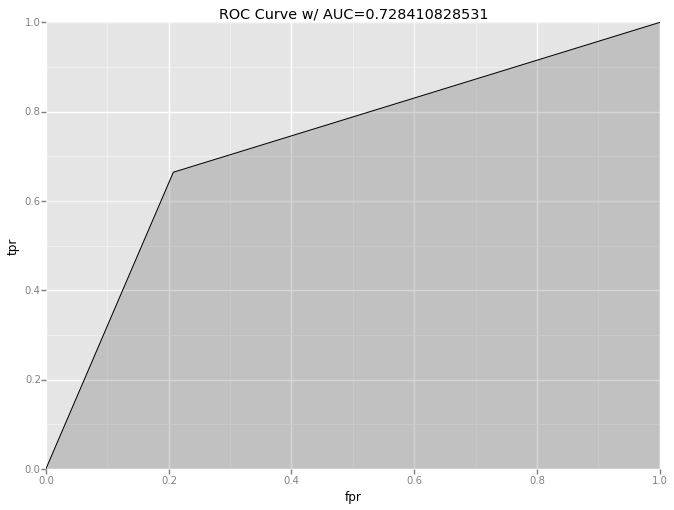

<ggplot: (74690164)>

In [57]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [58]:
x=sm.add_constant(X)
logit_mod = sm.Logit(Y, x).fit()
print logit_mod.summary()

Optimization terminated successfully.
         Current function value: 0.114140
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              open_flag   No. Observations:              2138169
Model:                          Logit   Df Residuals:                  2138163
Method:                           MLE   Df Model:                            5
Date:                Wed, 09 Mar 2016   Pseudo R-squ.:                  0.1352
Time:                        16:23:41   Log-Likelihood:            -2.4405e+05
converged:                       True   LL-Null:                   -2.8221e+05
                                        LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                  -3.9288      0.014   -290.755      0.000        -3.955    -3.902
se